1. 2018-08-06 07:08:00： 
    1. 机组报齿轮箱油泵出口压力高故障停机；
    2. 查看后台数据，发现出口压力达13bar，进口1.5bar;
    3. 上机组打开滤芯进行检查，发现铁粉较多，重齿厂家于23时45分赶往现场后上机排查发现齿轮箱中间齿轮轴点蚀，二级大后轴承有轻微异响，因二级大后轴承需内窥镜查看，现场无内窥镜，等明日内窥镜到场做进一步排查后在确定处理方案，目前该机组已停机。
1. 2018-08-07 11:08:00: 
    1. 2018.08.07 22：40重齿厂家携带内窥镜到达现场，上机组对齿轮箱进行检查，发现二级大后轴承磨损严重，需更换齿轮箱。

In [1]:
import os
import sys
sys.path.append("../../")
from imp import reload

import Reader
import toolkit
import visualization
# import GearboxFaultDetector
import model_entry

Using TensorFlow backend.
D:\Software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# reload(Reader)

In [3]:
feature_path = r"D:/Workspace/python_workspace/gearbox-fault-detection/local/feature/san_tang_hu/"
speed_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\rotating_speed\san_tang_hu"
wind_turbine = "40"
sensors = (
    "gearbox",
    "low_speed_shaft",
    "high_speed_shaft",
)

In [4]:
reader = Reader.Reader()
feature = reader.read_feature(os.path.join(feature_path, wind_turbine), sensors)
speed = reader.read_speed(os.path.join(speed_path, wind_turbine), sensors)

toolkit.print_shape(feature=feature)

feature.shape: (168, 75)


array([[<AxesSubplot:title={'center':'speed'}>]], dtype=object)

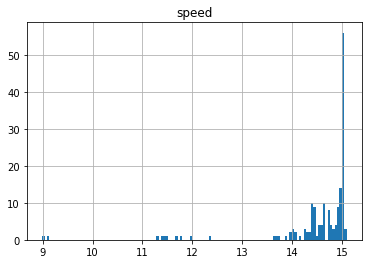

In [5]:
speed.hist(bins=128)

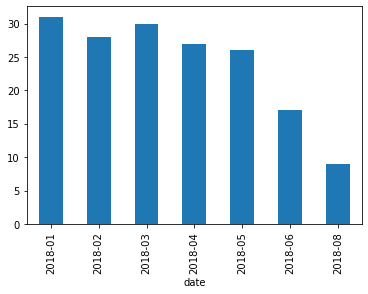

In [6]:
# feature = feature[speed.speed >= 1000]
# speed = speed[speed.speed >= 1000]

# toolkit.print_shape(feature=feature, speed=speed)

visualization.data_distribution(feature)

In [7]:
# 划分train set, test set
train_start = "2018-04"
train_end = "2018-07"

test_start = "2018-08"
test_end = "2018"

feature_train = feature[train_start: train_end]
# speed_train = speed[train_start: train_end]

feature_test = feature[test_start: test_end]
# speed_test = speed[test_start: test_end]

toolkit.print_shape(feature_train=feature_train, feature_test=feature_test)

feature_train.shape: (70, 75)
feature_test.shape: (9, 75)


In [11]:
feature_train[("gearbox", "rms")]

date
2018-04-01 06:00    0.355806
2018-04-02 00:00    0.362069
2018-04-03 12:00    0.243005
2018-04-04 00:00    0.368941
2018-04-05 00:00    0.376130
                      ...   
2018-06-14 02:00    0.260634
2018-06-17 22:00    0.204961
2018-06-18 16:00    0.060230
2018-06-19 06:00    0.085734
2018-06-20 03:00    0.090032
Freq: H, Name: (gearbox, rms), Length: 70, dtype: float64

In [8]:
feature_test = feature["2018-04": ]
# speed_test = speed

In [9]:
detector = model_entry.OutlierDetector()

In [10]:
detector.fit(feature_train)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.











<AxesSubplot:xlabel='date'>

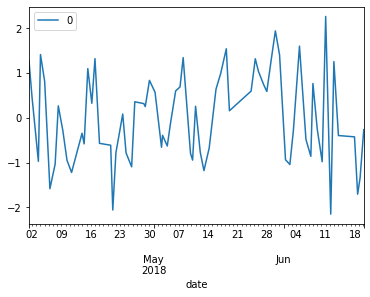

In [11]:
detector.decision_scores.plot()

In [12]:
anomaly_scores = detector.decision_function(feature_test)

<AxesSubplot:xlabel='date'>

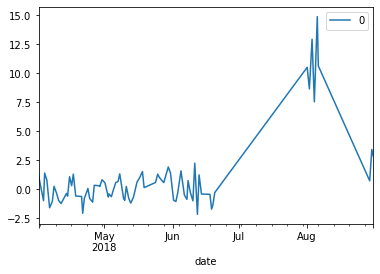

In [13]:
anomaly_scores.plot()

In [14]:
anomaly_scores[anomaly_scores[0] > 4]

,0
date,
2018-08-01 00:00,10.414506
2018-08-02 00:00,8.608519
2018-08-03 05:00,12.874699
2018-08-04 06:00,7.460512
2018-08-05 14:00,14.985543
2018-08-06 01:00,10.671721
